In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_csv(r"E:\downloads\archive (1)\calories.csv")

In [4]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['User_ID'],inplace=True)

In [10]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
df['Gender'] = df['Gender'].map({'male':1,'female':0})

In [17]:
df['Height'] = df['Height'] * 0.0328

In [18]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,6.2320,94.0,29.0,105.0,40.8,231.0
1,0,20,5.4448,60.0,14.0,94.0,40.3,66.0
2,1,69,5.8712,79.0,5.0,88.0,38.7,26.0
3,0,34,5.8712,71.0,13.0,100.0,40.5,71.0
4,0,27,5.0512,58.0,10.0,81.0,39.8,35.0


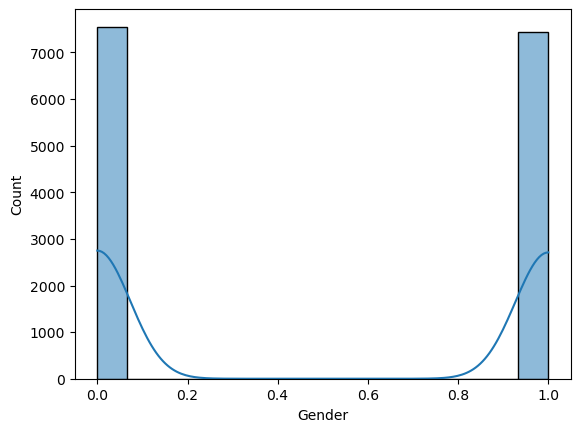

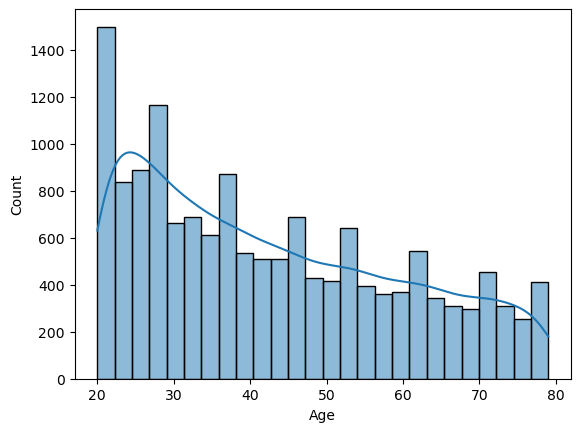

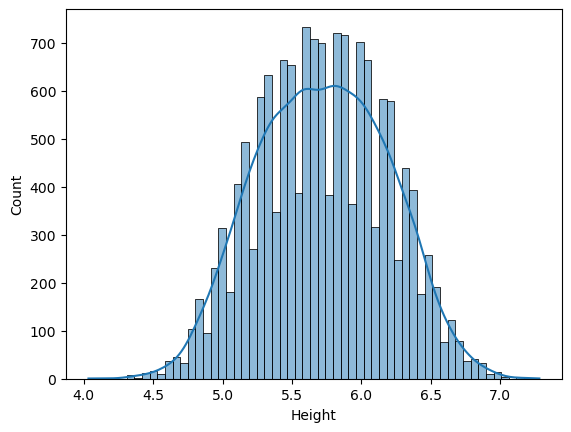

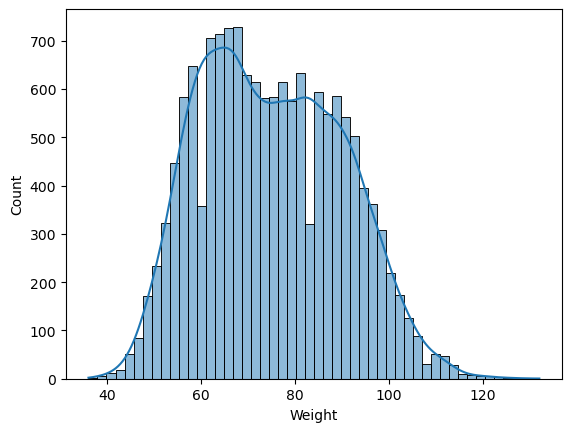

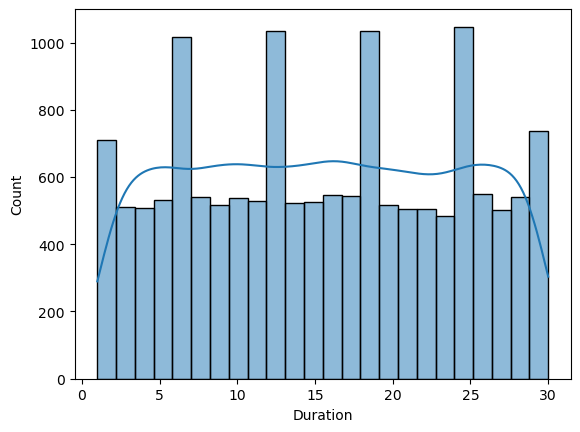

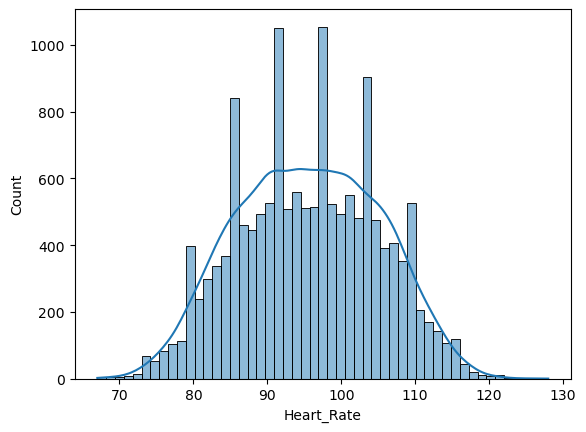

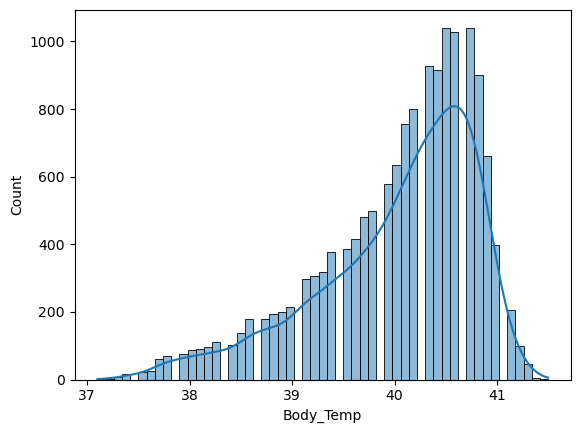

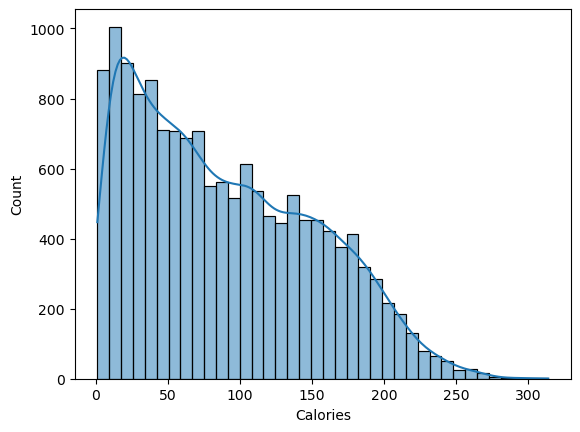

In [19]:
for i in df.columns:
    sns.histplot(df[i], kde=True)
    # sns.boxplot(x=df[i])
    plt.show()

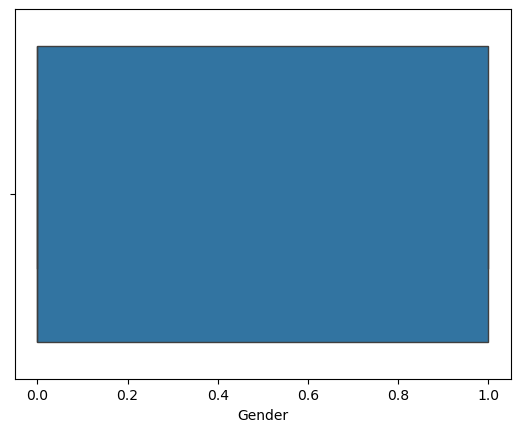

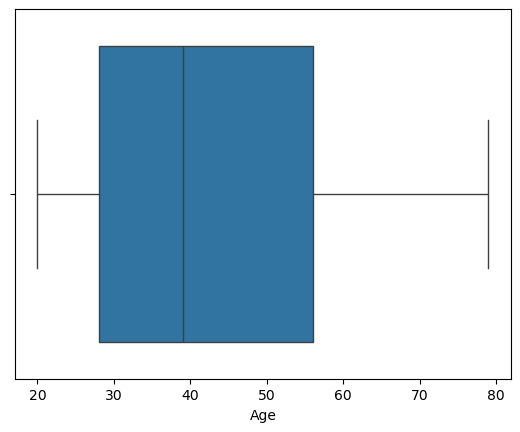

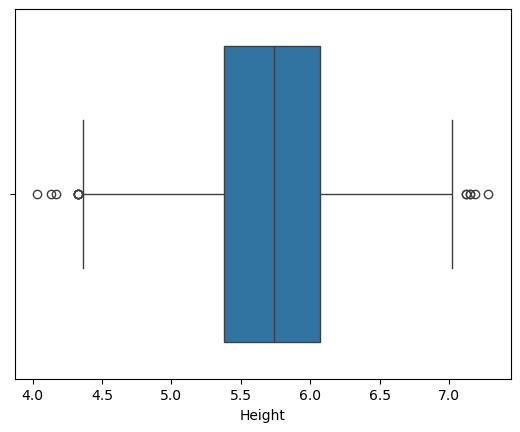

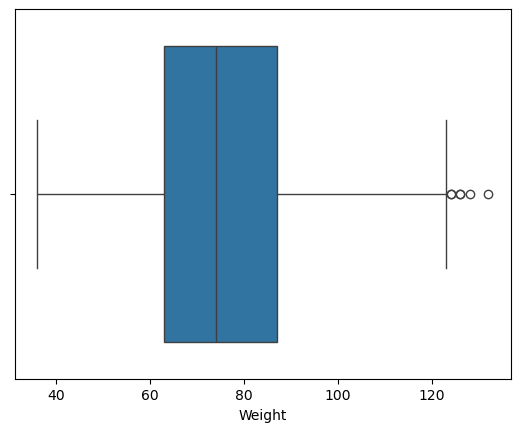

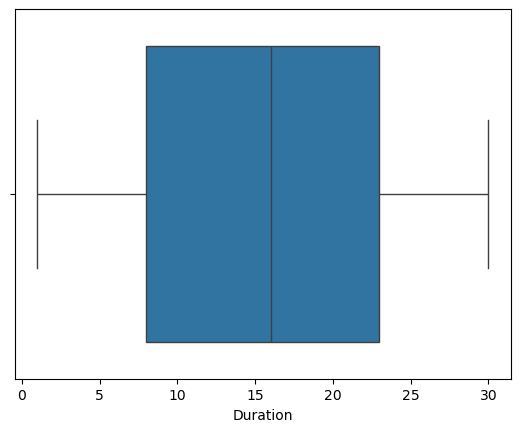

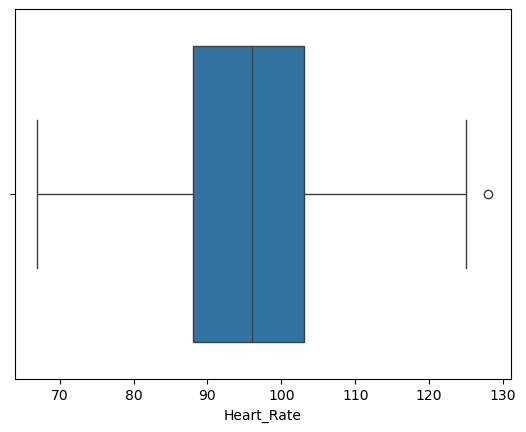

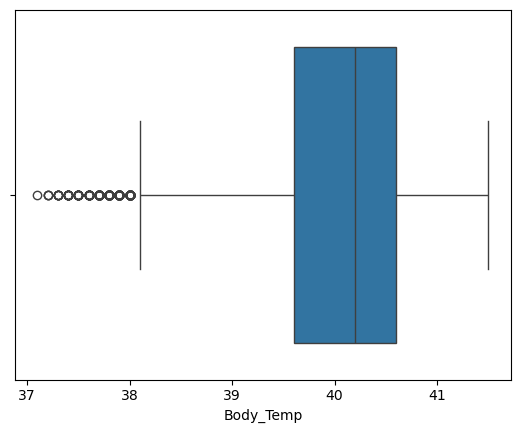

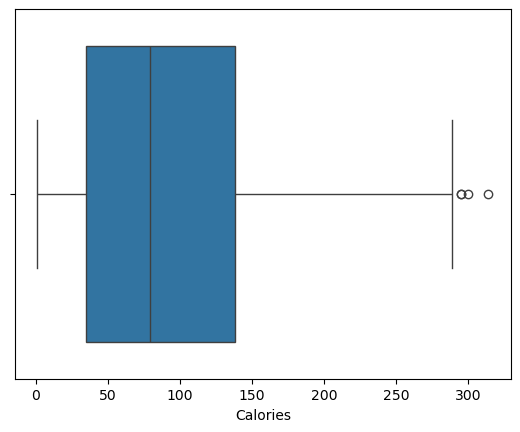

In [20]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

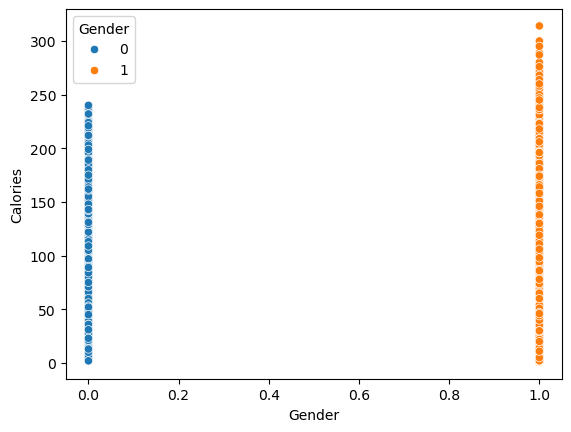

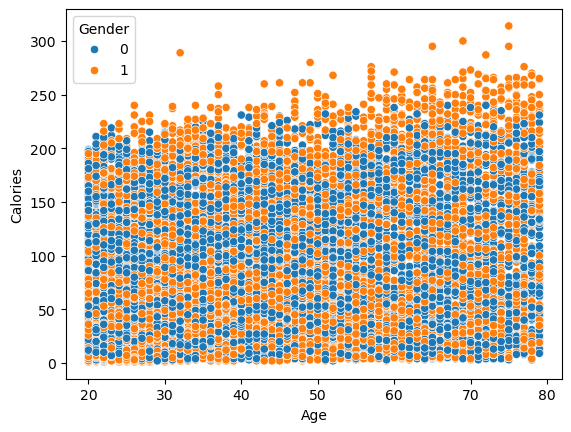

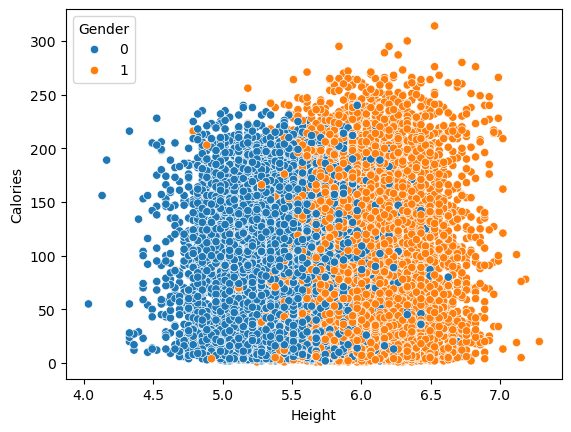

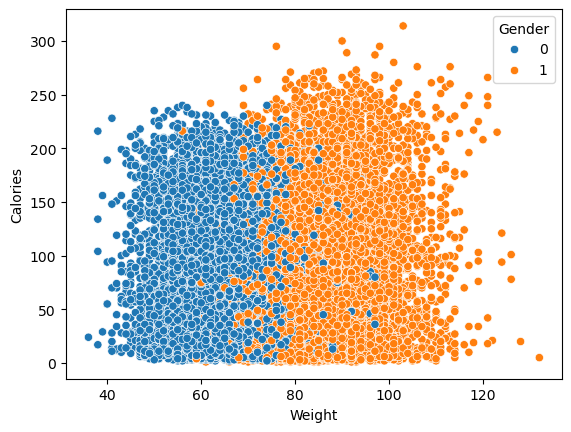

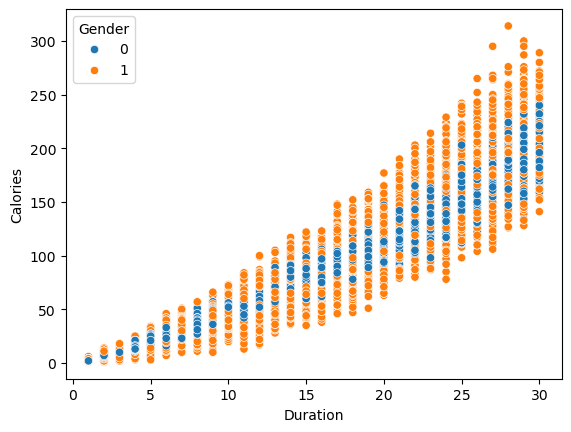

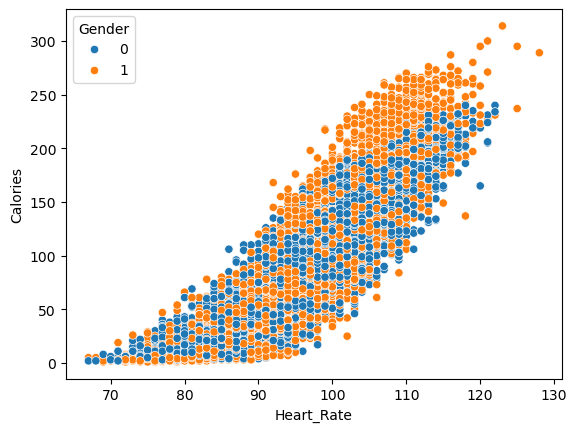

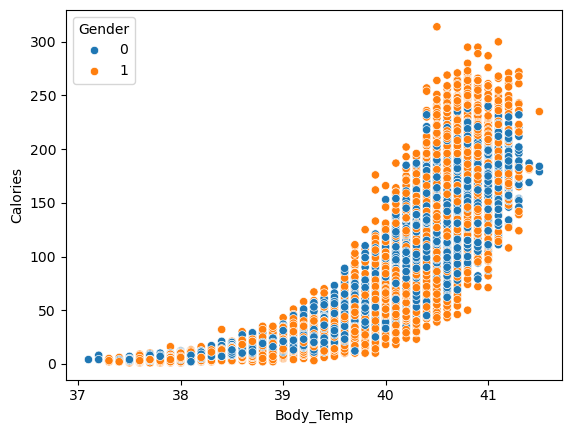

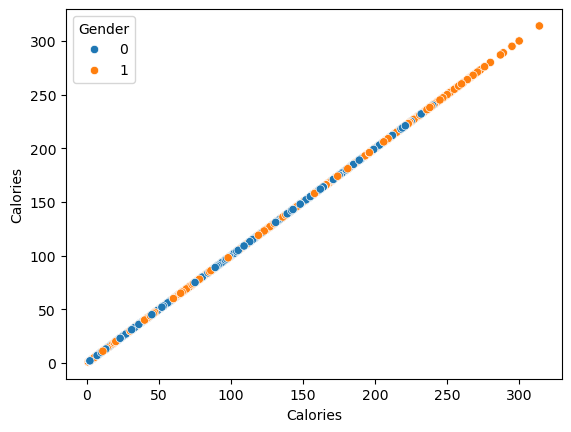

In [26]:
for i in df.columns:
    sns.scatterplot(x=df[i], y=df['Calories'], data=df,hue=df['Gender'])
    plt.show()

In [28]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    # Filter data within the calculated bounds
    filtered_data = df[(df[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Displaying initial shape of the dataset
print(f"Original dataset shape: {df.shape}")

Original dataset shape: (15000, 8)


In [30]:
# Removing outliers for each selected column
for col in df.columns:
    original_shape = df.shape[0]  # Initial row count
    df = remove_outliers_iqr(df, col)  # Removing outliers
    new_shape = df.shape[0]  # Row count after outlier removal
    # Print how many outliers were removed
    print(f"Removed {original_shape - new_shape} outliers from '{col}' column.")

# Final shape after outlier removal
print(f"\nFinal dataset shape after outlier removal: {df.shape}")

# Summary of the cleaned data
print("\nCleaned Data Overview:")
print(df.describe())

Removed 0 outliers from 'Gender' column.
Removed 0 outliers from 'Age' column.
Removed 14 outliers from 'Height' column.
Removed 2 outliers from 'Weight' column.
Removed 0 outliers from 'Duration' column.
Removed 1 outliers from 'Heart_Rate' column.
Removed 368 outliers from 'Body_Temp' column.
Removed 4 outliers from 'Calories' column.

Final dataset shape after outlier removal: (14611, 8)

Cleaned Data Overview:
             Gender           Age       Height        Weight      Duration  \
count  14611.000000  14611.000000  14611.00000  14611.000000  14611.000000   
mean       0.496407     42.817329      5.72238     74.961673     15.883376   
std        0.500004     16.984229      0.46533     14.974673      8.110054   
min        0.000000     20.000000      4.36240     38.000000      1.000000   
25%        0.000000     28.000000      5.37920     63.000000      9.000000   
50%        0.000000     40.000000      5.70720     74.000000     16.000000   
75%        1.000000     56.000000   

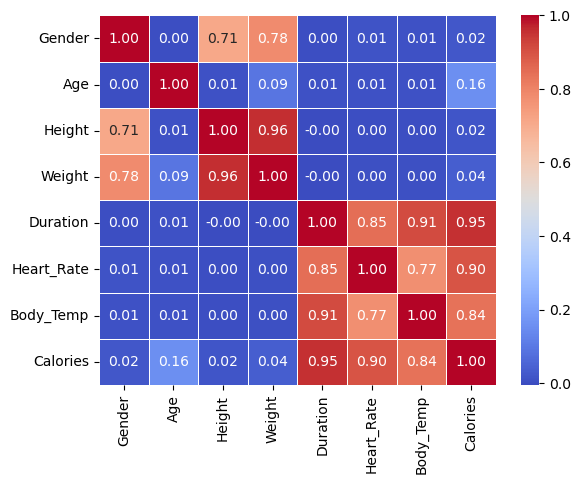

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [37]:
df_new=df.drop(columns=['Height','Body_Temp'])

In [38]:
df_new.head()

,Gender,Age,Weight,Duration,Heart_Rate,Calories
0,1,68,94.0,29.0,105.0,231.0
1,0,20,60.0,14.0,94.0,66.0
2,1,69,79.0,5.0,88.0,26.0
3,0,34,71.0,13.0,100.0,71.0
4,0,27,58.0,10.0,81.0,35.0


In [39]:
#model training

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt_clf = DecisionTreeRegressor()

In [57]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


models = {
   
    "DT": DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "GBR": GradientBoostingRegressor(),
    "XGB": XGBRegressor(verbosity=0)

}

In [63]:
params_dist = {

    "DT": {
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],  # Removed 'poisson'
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']  # Removed 'auto'
    },

    "RF": {
        'n_estimators': [50, 100, 200],
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],  # Removed 'poisson'
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']  # Removed 'auto'
    },

    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    },

    "GBR": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    "XGB": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.9, 1],
        'colsample_bytree': [0.7, 0.9, 1]
    }
}


In [59]:
results = {}

In [64]:
from sklearn.model_selection import RandomizedSearchCV


for name, model in models.items():
    print(f"Running RandomizedSearchCV for {name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params_dist[name],
        n_iter=10,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(xtrain, ytrain)
    
    results[name] = {
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'best_estimator': random_search.best_estimator_
    }
    
    print(f"Best params for {name}: {random_search.best_params_}")
    print(f"Best CV accuracy for {name}: {random_search.best_score_}\n")

Running RandomizedSearchCV for DT...


e:\application data\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params for DT: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'squared_error'}
Best CV accuracy for DT: nan

Running RandomizedSearchCV for RF...


e:\application data\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params for RF: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'friedman_mse'}
Best CV accuracy for RF: nan

Running RandomizedSearchCV for KNN...


e:\application data\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params for KNN: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'algorithm': 'ball_tree'}
Best CV accuracy for KNN: nan

Running RandomizedSearchCV for GBR...


e:\application data\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params for GBR: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.2}
Best CV accuracy for GBR: nan

Running RandomizedSearchCV for XGB...
Best params for XGB: {'subsample': 1, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1}
Best CV accuracy for XGB: nan



e:\application data\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [66]:
best_params = {
    "DT": {'min_samples_split': 5,
            'min_samples_leaf': 4, 
            'max_features': 'sqrt', 
            'max_depth': 10, 
            'criterion': 'squared_error'},
    "RF": {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'friedman_mse'},
    "KNN": {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'algorithm': 'ball_tree'},
    "GBR": {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.2},
    "XGB": {'subsample': 1, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1}
}

In [67]:
model_classes = {
    "DT": DecisionTreeRegressor,
    "RF": RandomForestRegressor,
    "KNN": KNeighborsRegressor,
    "GBR": GradientBoostingRegressor,
    "XGB": XGBRegressor
}

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


print("🔍 Model Evaluation Results:\n")

for name in best_params:
    model = model_classes[name](**best_params[name])
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    r2 = r2_score(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    rmse = np.sqrt(mean_squared_error(ytest, y_pred))

    print(f"🔸 {name} Results:")
    print(f"   R² Score      : {r2:.4f}")
    print(f"   MAE           : {mae:.4f}")
    print(f"   RMSE          : {rmse:.4f}\n")

🔍 Model Evaluation Results:

🔸 DT Results:
   R² Score      : 0.9718
   MAE           : 7.0757
   RMSE          : 10.3488

🔸 RF Results:
   R² Score      : 0.9975
   MAE           : 1.8222
   RMSE          : 3.0663

🔸 KNN Results:
   R² Score      : 0.9884
   MAE           : 4.5583
   RMSE          : 6.6192

🔸 GBR Results:
   R² Score      : 0.9990
   MAE           : 1.3140
   RMSE          : 1.9600

🔸 XGB Results:
   R² Score      : 0.9990
   MAE           : 1.3498
   RMSE          : 1.9908



In [70]:
GBR = GradientBoostingRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 4, max_depth= 7, learning_rate= 0.2)

In [71]:
XGB = XGBRegressor(subsample= 1, n_estimators= 100, max_depth= 7, learning_rate= 0.2, colsample_bytree= 1)

In [72]:
from sklearn.ensemble import VotingRegressor


ensemble = VotingRegressor(
    estimators=[
        ('gbr', GBR),
        ('xgb', XGB)
        ]
    )

In [73]:
ensemble.fit(xtrain, ytrain)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.2,
                                                       max_depth=7,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_t...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.2, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))])

In [74]:
y_pred = ensemble.predict(xtest)

In [75]:
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

print("Voting Regressor (GBR + XGB) Results:")
print(f"R² Score      : {r2:.4f}")
print(f"MAE           : {mae:.4f}")
print(f"RMSE          : {rmse:.4f}")

Voting Regressor (GBR + XGB) Results:
R² Score      : 0.9992
MAE           : 1.1677
RMSE          : 1.7618


In [76]:
import joblib


joblib.dump(ensemble, 'calorie_prediction_voting_regressor_model.pkl')

print("Model saved as calorie_prediction_voting_regressor_model.pkl")

Model saved as calorie_prediction_voting_regressor_model.pkl
